In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


df=pd.read_csv('forestfires.csv')
print("Head:", df.head())
print("Statistical Description:", df.describe())

Head:    X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
Statistical Description:                 X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  66

In [63]:
# Encode Data
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

(13, 0)

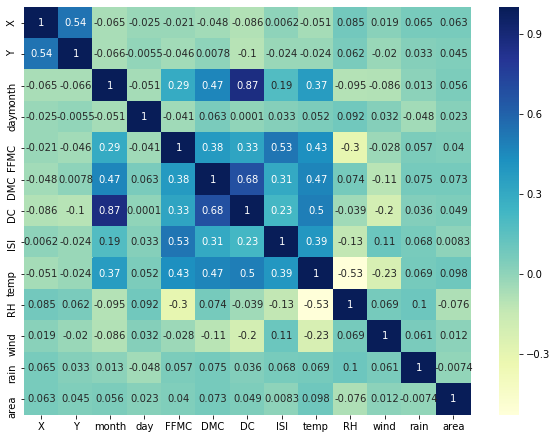

In [64]:
# Observe correlations between features and target

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(10,7.5))
ax = sns.heatmap(corr,
       annot = True,
       cmap="YlGnBu")

ax.set_ylim(13, 0)

In [65]:
# Instantiate features vs target
X = df.drop(['area'], axis=1)
y = df['area']

# Split data into test and train

import sklearn.model_selection


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,
                                    y, test_size = 0.15, random_state = 5)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.metrics import r2_score

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
# models.append(('LgRg', LogisticRegression()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    # Returns mean accuracy
    score = model.score(X_test, y_test)
    
    #R^2
    r2 = r2_score(y_test, y_pred) 
    
    mae = mean_absolute_error(y_pred, y_test)
    results.append(mae)
    names.append(name)

    print(f'name: {name}, R^2: {r2} score: {score}, mae: {mae}')

name: LiR, R^2: 0.009939789403536237 score: 0.009939789403536237, mae: 26.53932619133416
name: Ridge, R^2: 0.009926600499985283 score: 0.009926600499985283, mae: 26.510117136530152
name: Lasso, R^2: 0.003967685015603517 score: 0.003967685015603517, mae: 26.304507469227083
name: ElasticNet, R^2: 0.004020079212166849 score: 0.004020079212166849, mae: 26.162067112320603
name: Bag_Re, R^2: -0.07178483640517963 score: -0.07178483640517963, mae: 32.44029935897436
name: RandomForest, R^2: -0.15107291316493732 score: -0.15107291316493732, mae: 35.506134188034174
name: ExtraTreesRegressor, R^2: -0.16201176747684887 score: -0.16201176747684887, mae: 37.278762820512824
name: KNN, R^2: -0.06769952900564657 score: -0.06769952900564657, mae: 28.85076923076923
name: CART, R^2: -0.033476871072231296 score: -0.033476871072231296, mae: 23.731282051282047
name: SVM, R^2: -0.021833820611429244 score: -0.021833820611429244, mae: 19.895962923216924


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [67]:
# Instantiate features vs target
X = df.drop(['area'], axis=1)
y = df['area']

# Update target vector to 1 if there was a fire, 0 if there was not
for i in range(0, len(y)):
    if y.iloc[i] > 0:
        y.iloc[i] = 1
    else:
        y.iloc[i] = 0
        
# Split data into test and train

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,
                                    y, test_size = 0.15, random_state = 5)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(13, 0)

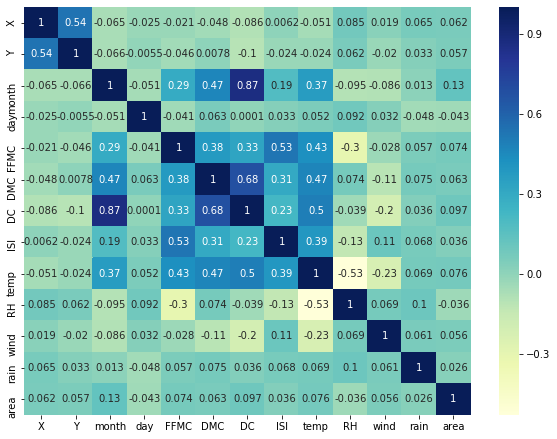

In [68]:
# Observe correlations between features and target

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(10,7.5))
ax = sns.heatmap(corr,
       annot = True,
       cmap="YlGnBu")

ax.set_ylim(13, 0)

In [69]:
# Instantiate logistic regression model
from sklearn.linear_model import LogisticRegression

# Chose this solver first 
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
# Determine accuracy of model
score = clf.score(X_test, y_test)
print(score)

0.5128205128205128


In [71]:
# Try other logistic regression solvers to attempt to improve model accuracy
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
r2 = r2_score(y_test, y_pred) 
print(f'score: {score} r^2: {r2}')

clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
r2 = r2_score(y_test, y_pred) 
print(f'score: {score} r^2: {r2}')

clf = LogisticRegression(random_state=5, solver='lbfgs',
                        multi_class='multinomial')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
r2 = r2_score(y_test, y_pred) 
print(f'score: {score} r^2: {r2}')

score: 0.5 r^2: -2.883384297032222
score: 0.5384615384615384 r^2: -2.883384297032222
score: 0.5 r^2: -2.883384297032222


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [72]:
# Now we can see our best model comes from the newton-cg solver.  This solver
# is supposed to be good for multiclass problems

In [73]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
# models.append(('LgRg', LogisticRegression()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    # Returns mean accuracy
    score = model.score(X_test, y_test)
    
    mae = mean_absolute_error(y_pred, y_test)
    results.append(mae)
    names.append(name)
    
    #R^2
    r2 = r2_score(y_test, y_pred) 

    print(f'name: {name}, r^2: {r2} score: {score}, mae: {mae}')

name: LiR, r^2: 0.0017433073217055783 score: 0.0017433073217055783, mae: 0.4833347678188981
name: Ridge, r^2: 0.0017183466330008557 score: 0.0017183466330008557, mae: 0.4833496733376619
name: Lasso, r^2: -0.030726857787792383 score: -0.03072685778779238, mae: 0.49504569913547475
name: ElasticNet, r^2: -0.03076564424985162 score: -0.03076564424985162, mae: 0.4949012405988486
name: Bag_Re, r^2: -0.16201441317776255 score: -0.16201441317776255, mae: 0.46175213675213683
name: RandomForest, r^2: -0.008488904140929066 score: -0.008488904140929066, mae: 0.4348290598290599
name: ExtraTreesRegressor, r^2: -0.21563829787234057 score: -0.21563829787234057, mae: 0.4532051282051283
name: KNN, r^2: -0.03000686341798242 score: -0.03000686341798242, mae: 0.4282051282051282
name: CART, r^2: -0.5658888126286894 score: -0.5658888126286894, mae: 0.3782051282051282
name: SVM, r^2: -0.014863943756043385 score: -0.014863943756043385, mae: 0.47310306938896673


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [74]:
#  All these scores are pretty bad, so lets stick to logreg
#  Lets try improving our model with cross validation

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

solvers = ['newton-cg', 'liblinear', 'sag']

for this_solver in solvers: 
    clf = LogisticRegressionCV(solver=this_solver)
    clf.fit(X_train, y_train)
    r2 = r2_score(y_test, y_pred)  
    score = clf.score(X_test, y_test)
    cvs = cross_val_score(clf, X, y, scoring='recall_macro', cv=3)
    print(f'Solver: {this_solver} cvs: {cvs})

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Solver: newton-cg cvs: [0.49317269 0.36355014 0.47479675] R^2: -0.014863943756043385
Solver: liblinear cvs: [0.48761714 0.36355014 0.47479675] R^2: -0.014863943756043385


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/ana

Solver: sag cvs: [0.48761714 0.35745257 0.47479675] R^2: -0.014863943756043385


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which mean

ValueError: x and y must be the same size

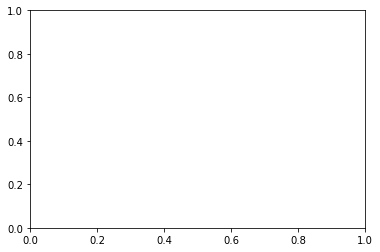

In [83]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [82]:
clf = LogisticRegressionCV(solver='newton-cg')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

test_pred = zip(y_test, y_pred)
print(y_test, y_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


184    1.0
282    0.0
478    1.0
382    1.0
71     0.0
      ... 
476    1.0
319    1.0
482    1.0
305    0.0
49     0.0
Name: area, Length: 78, dtype: float64 [1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 0.]


In [75]:
df=pd.read_csv('forestfires.csv')
df.head()

# Encode Data
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

dataset = df.values
X = dataset[:,0:12]
y = dataset[:,12]